# Logistic Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
from plot_class import *
from sigmoid import *
from cross_entropy_loss import *
from plot_decision_boundary import *

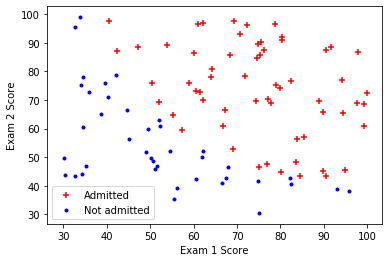

In [2]:
# Load the dataset with numpy
data = np.loadtxt('ex2data1.txt', delimiter=',')

x = data[:, 0:2]
y = data[:, 2]

plot_class(x, y)
plt.xlabel("Exam 1 Score")
plt.ylabel("Exam 2 Score")
plt.legend(["Admitted", "Not admitted"])
plt.show()

In order to find a boundary between the two categories, I am using logistic regression. The model for logistic regression is: $$ h_{\theta}(x) = g(\theta^{T}x). $$ The function $g: \mathbb{R} \rightarrow [0,1]$ is called the sigmoid function defined as $$g(z) = \frac{1}{1 + e^{-z}}.$$  
Note that the output of $g$ is in the range $[0,1].$

Text(0.5, 1.0, '')

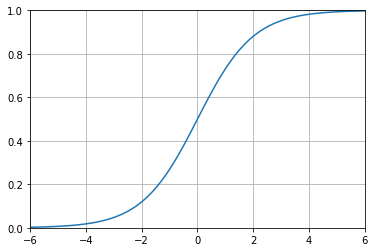

In [3]:
z = np.linspace(-6, 6, 100)
output = sigmoid(z)
plt.plot(z, output)
plt.grid(b=True, which='both', axis='both')
plt.xlim(-6, 6)
plt.ylim(0, 1)
plt.title("")

In [4]:
m, n = x.shape
X = np.concatenate((np.ones((m, 1)), x), axis=-1)
theta = np.zeros((n + 1, 1))

Test the intial theta

In [5]:
cross_entropy_loss(theta, X, y)

0.6931471805599453

In [6]:
cross_entropy_gradient(theta, X, y)

array([ -0.1       , -12.00921659, -11.26284221])

In [7]:
options = {'eps':0.5e-5, 'maxiter':400}
out = opt.minimize(fun=cross_entropy_loss, x0=theta, jac=cross_entropy_gradient, method='TNC', args=(X, y), options=options)

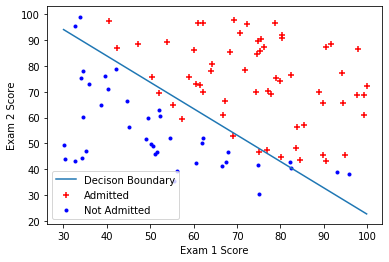

In [9]:
theta = out.x

plot_class(x, y)
plot_decision_boundary(theta, X, y)
plt.xlabel("Exam 1 Score")
plt.ylabel("Exam 2 Score")
plt.legend(["Decison Boundary", "Admitted", "Not Admitted"])
plt.show()

In [31]:
acc = np.sum((np.dot(X, theta) > 0) == y) / 100
acc

0.89